<a href="https://colab.research.google.com/github/BillieFaiqul/2141720051-Billie_Faiqul_izzat-Mechin/blob/main/3D_11_Billie_Faiqul_Izzat_Week04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **TUGAS PRAKTIKUM**

1. Buatlah model klasifikasi dengan menggunakan SVM untuk data suara

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('voice.csv')
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


kemudian hitung jumlah kemunculan setiap nilai (unique value) dalam kolom 'label' pada DataFrame 'df'. Hasilnya adalah serangkaian nilai yang unik beserta jumlah kemunculan masing-masing nilai tersebut dalam kolom 'label'

In [ ]:
df['label'].value_counts()

male      1584
female    1584
Name: label, dtype: int64

kemudian mengkodekan variabel kategori(label) menjadi nilai numerik

In [ ]:
encoder = LabelEncoder()
df['label'] = encoder.fit_transform(df['label'])
df['label'].head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

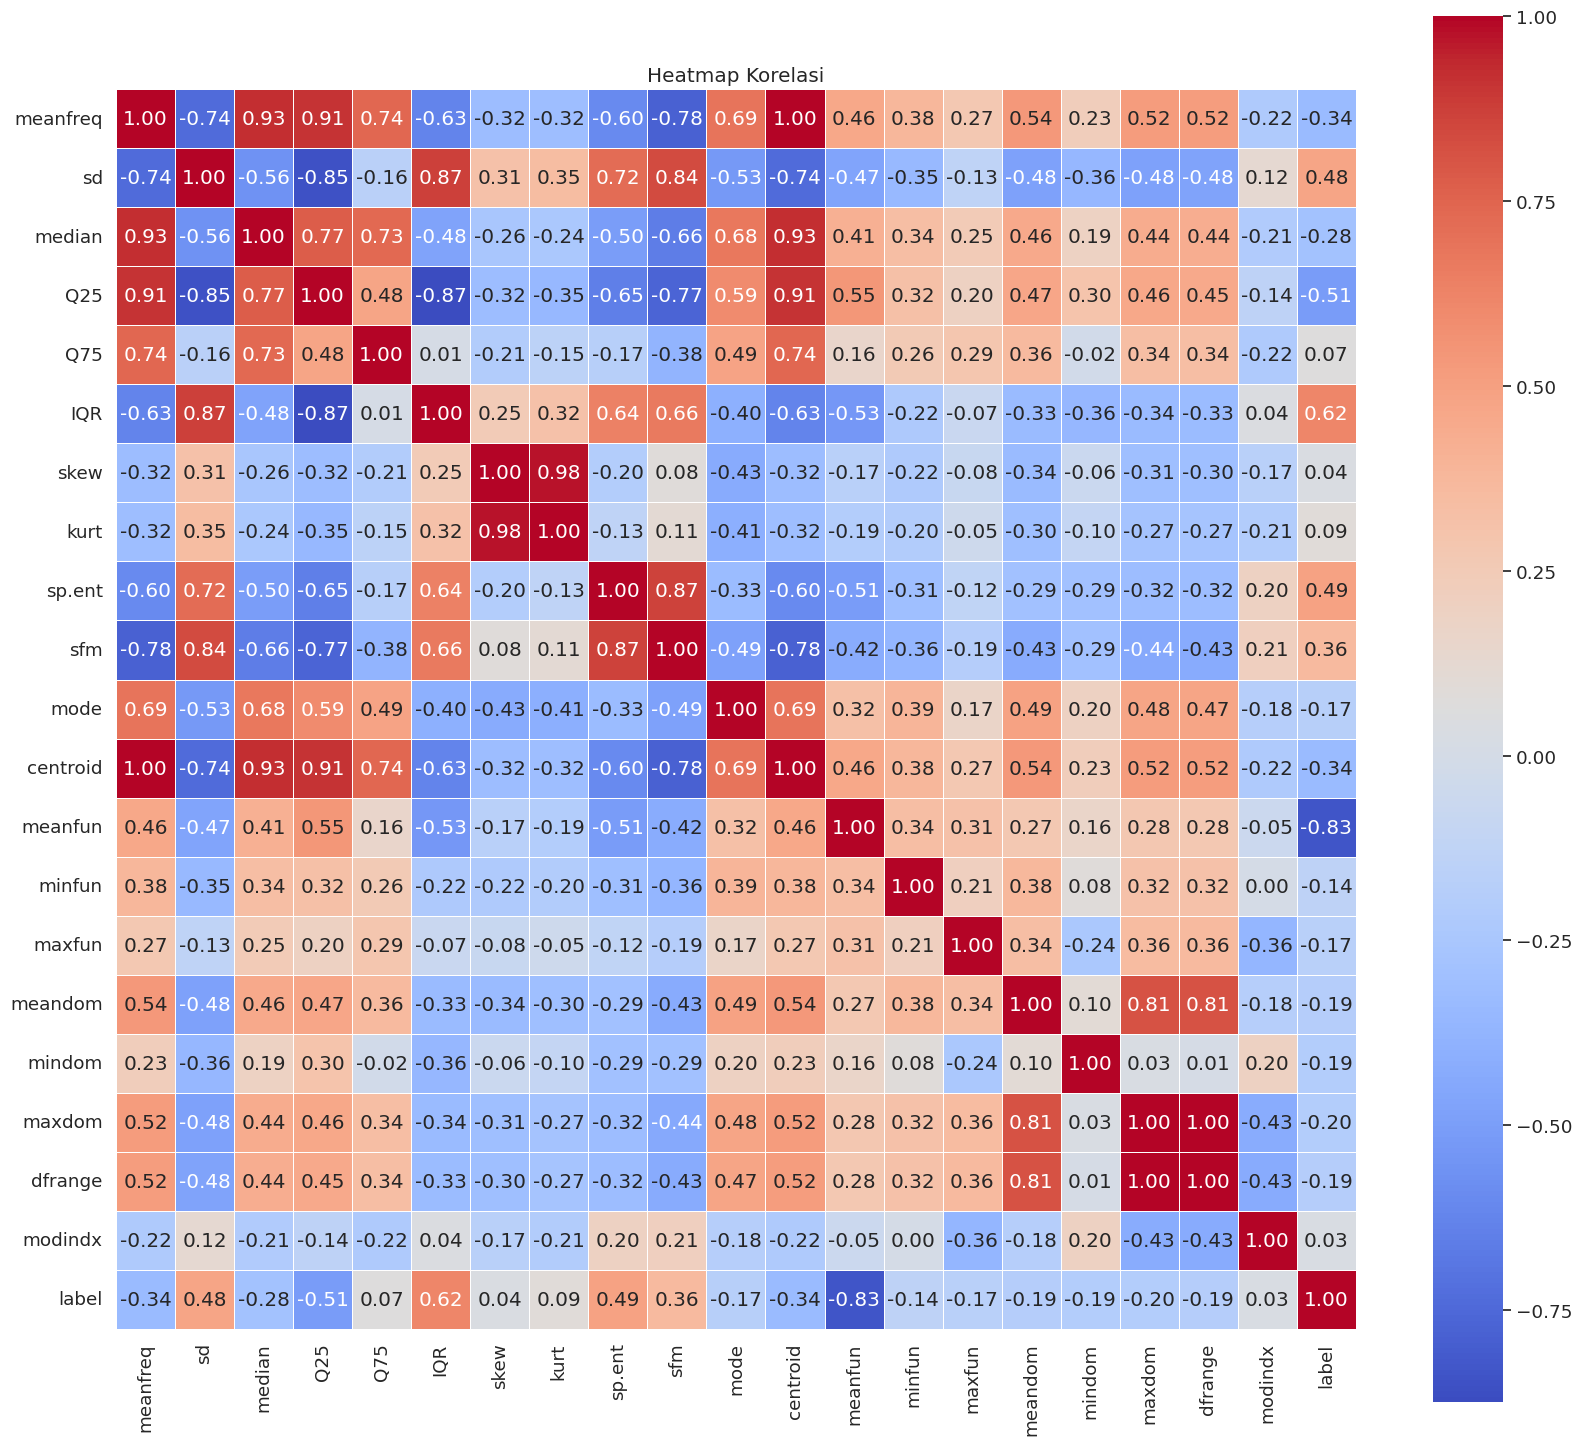

In [ ]:
# Buat sebuah heatmap korelasi dari DataFrame 'df' menggunakan pustaka seaborn (sns) dan matplotlib (plt)
plt.figure(figsize=(20, 18))
corr_matrix = df.corr()
sns.set(font_scale=1.2)
sns.heatmap(corr_matrix,
            cmap='coolwarm',
            linewidths=0.5,
            fmt=".2f",
            annot=True,
            cbar=True,
            square=True)

plt.title('Heatmap Korelasi')
plt.show()

indentifikasi variabel independen dan dipenden

In [ ]:
X = df.iloc[:,:20]
y = df.label

Split data training dan testing menjado 70:30

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 1)
x1 = type(X.to_numpy())
x1

numpy.ndarray

In [ ]:
df.drop(['dfrange', 'centroid'], axis=1, inplace=True)
X = df[df.columns.difference(['label'])]
y = df['label']
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-0.21477826, -2.57610164, -5.69360723, ...,  0.4715753 ,
         2.29330585, -0.03908279],
       [-0.25848536, -2.48688452, -5.58898726, ...,  0.59443122,
         4.54805598, -0.06523603],
       [ 0.90932569, -2.7069865 , -3.92869875, ...,  0.39826097,
         6.51365636, -1.08373029],
       ...,
       [ 2.49266553, -2.1990394 , -0.01712269, ...,  1.38585653,
        -0.29804429,  1.15019826],
       [ 2.15365344, -1.99185206, -0.20402146, ...,  1.50571108,
        -0.36536651,  1.22984967],
       [ 2.25467137, -1.44608897,  1.10267866, ...,  1.08912637,
        -0.33848726,  0.97175912]])

Text(0, 0.5, 'No. of persons')

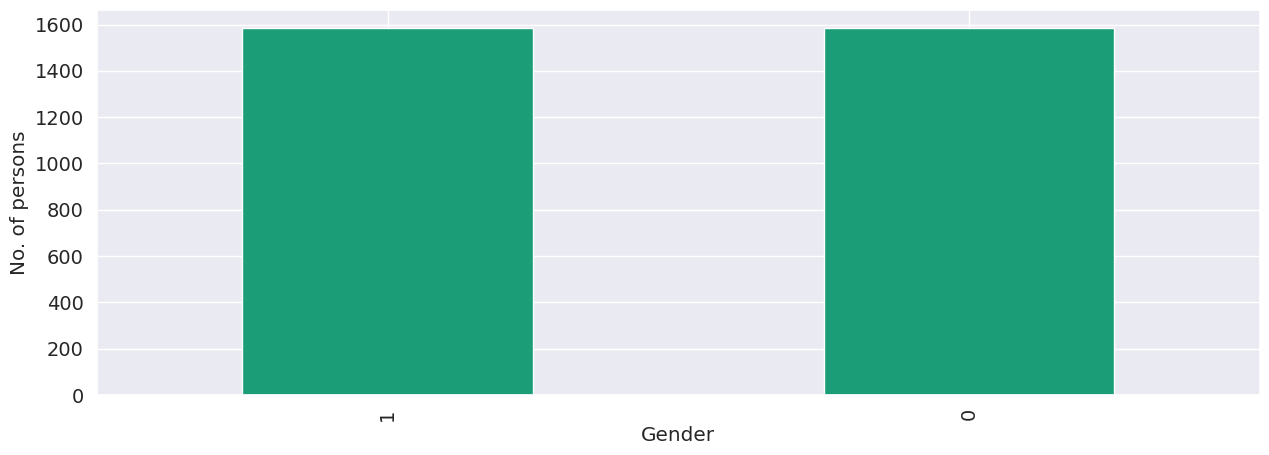

In [ ]:
df['label'].value_counts().plot(kind='bar',figsize = (15,5),fontsize = 14,colormap='Dark2')
plt.xlabel('Gender')
plt.ylabel('No. of persons')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
# Import SVM
from sklearn.svm import SVC
from sklearn import metrics
svc=SVC()

svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
acc = metrics.accuracy_score(y_test,y_pred)
print(f'Accuracy Score : {int(acc * 100)}%')

Accuracy Score : 98%


2. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,
    1. Menggunakan data `spam.csv`
    2. Fitur `CountVectorizer` dengan mengaktifkan **stop_words**
    3. Evaluasi hasilnya

In [ ]:
# Load data
df = pd.read_csv('spam.csv', encoding='latin-1') # spesifiksi encoding diperlukan karena data tidak menggunakan UTF-8
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
# Drop 3 kolom terakhir dengan fungsi iloc kemudian cek data
df = df.drop(df.iloc[:,2:], axis=1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Ubah nama kolom v1 dan v2 kemudian lakukan cek data
new_cols = {
    'v1': 'Labels',
    'v2': 'SMS'
}

df = df.rename(columns=new_cols)

df.head()

,Labels,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Cek jumlah data perkelas, kelengkapan data dan cek statistik deskriptif
print(df['Labels'].value_counts())
print('\n')

print(df.info())
print('\n')

print(df.describe())

ham     4825
spam     747
Name: Labels, dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Labels  5572 non-null   object
 1   SMS     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


       Labels                     SMS
count    5572                    5572
unique      2                    5169
top       ham  Sorry, I'll call later
freq     4825                      30


In [ ]:
# Encode label
new_labels = {
    'spam': 1,
    'ham': 0
}

df['Labels'] = df['Labels'].map(new_labels)

df.head()

,Labels,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Mamisahkan Fitur dengan Label
X = df['SMS'].values
y = df['Labels'].values

### Fitur CountVectorizer dengan mengaktifkan stop_words

In [ ]:
# Split data training dan testing menjadi 70:30 serta lakukan
# Inisiasi CountVectorizer kemudian Fitting dan transform X_train dengan CountVectorizer kemudian Transform X_test
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)
bow = CountVectorizer(stop_words='english')

X_train = bow.fit_transform(X_train)

X_test = bow.transform(X_test)

### Evaluasi Hasil

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

mnb = MultinomialNB()

mnb.fit(X_train, y_train)

y_pred_train = mnb.predict(X_train)

acc_train = accuracy_score(y_train, y_pred_train)

y_pred_test = mnb.predict(X_test)

acc_test = accuracy_score(y_test, y_pred_test)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train * 100:2f}%')
print(f'Hasil akurasi data test: {acc_test * 100:2f}%')

Hasil akurasi data train: 99.358974%
Hasil akurasi data test: 98.325359%


3. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,
    1. Menggunakan data `spam.csv`
    2. Fitur `TF-IDF` dengan mengaktifkan **stop_words**
    3. Evaluasi hasilnya dan bandingkan dengan hasil pada Tugas no 2.
    4. Berikan kesimpulan fitur mana yang terbaik pada kasus data `spam.csv`

In [ ]:
X = df['SMS'].values
y = df['Labels'].values

In [ ]:
# Fitur TF-IDF dengan mengaktifkan stop_words
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Split data training dan testing menjadi 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

# Inisiasi CountVectorizer
tfidf = TfidfVectorizer(stop_words='english')

# Fitting dan transform X_train dengan TF-IDF
X_train = tfidf.fit_transform(X_train)

# Transform X_test
X_test = tfidf.transform(X_test)

Evaluasi hasilnya dan bandingkan dengan hasil pada tugas no 2

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Inisiasi MultinomialNB
mnb = MultinomialNB()

# Fit model
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_pred_train = mnb.predict(X_train)

# Evaluasi akurasi data training
acc_train = accuracy_score(y_train, y_pred_train)

# Prediksi dengan data test
y_pred_test = mnb.predict(X_test)

# Evaluasi akurasi data training
acc_test = accuracy_score(y_test, y_pred_test)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train * 100:f}%')
print(f'Hasil akurasi data test: {acc_test * 100:f}%')

Hasil akurasi data train: 98.410256%
Hasil akurasi data test: 96.351675%


Kesimpulan dari hasil evaluasi akurasi model klasifikasi Multinomial Naive Bayes dengan menggunakan dua jenis fitur, yaitu CountVectorized (CV) dan TF-IDF (Term Frequency-Inverse Document Frequency), adalah sebagai berikut:

1. CountVectorized (CV):

 * Akurasi data training menggunakan CV
adalah sekitar 99.36%.
 * Akurasi data testing menggunakan CV adalah sekitar 98.33%.
 * Hasil akurasi yang tinggi pada data training dan testing menunjukkan bahwa model yang menggunakan fitur CV sangat baik dalam memprediksi apakah sebuah pesan adalah spam atau bukan.
 * Model ini mungkin mengalami overfitting, yang mengindikasikan bahwa model terlalu terbiasa dengan data pelatihan dan mungkin tidak dapat generalisasi dengan baik pada data baru. Meskipun begitu, hasil akurasi pada data testing masih sangat tinggi.
2. TF-IDF:

 * Akurasi data training menggunakan TF-IDF adalah sekitar 98.41%.
 * Akurasi data testing menggunakan TF-IDF adalah sekitar 96.35%.
 * Model yang menggunakan fitur TF-IDF juga memiliki hasil akurasi yang baik, meskipun sedikit lebih rendah dibandingkan dengan model menggunakan CV.
 * Perbedaan antara akurasi data training dan testing lebih kecil, menunjukkan bahwa model TF-IDF mungkin lebih umum dan tidak terlalu spesifik pada data pelatihan.

Secara pribadi, saya lebih memilih TF-IDF karena meskipun hasil akurasinya sedikit lebih rendah daripada CV, fitur TF-IDF lebih fleksibel dan dapat digunakan dengan berbagai jenis data. Selain itu, model TF-IDF cenderung memiliki kemampuan generalisasi yang lebih baik daripada model CV. Dengan demikian, TF-IDF bisa menjadi pilihan yang lebih baik jika Anda ingin membangun model yang dapat digunakan dengan beragam data tanpa harus mengalami overfitting.

Penting untuk dicatat bahwa pemilihan antara CV dan TF-IDF juga dapat tergantung pada jenis data yang Anda miliki dan tujuan Anda dalam membangun model klasifikasi. Jadi, pertimbangkan dengan baik kebutuhan dan karakteristik spesifik dari proyek Anda sebelum memilih fitur yang sesuai.